In [76]:
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
df= pd.read_csv('Titanic-Dataset.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data cleaning

In [9]:
df['Age']= df['Age'].fillna(df['Age'].mean(),inplace=True)

In [14]:
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

#### Cabin column contains very high amount of null values which can affect in model, so removing it

In [11]:
df= df.drop('Cabin',axis=1)

#### Removing unnecessary columms

In [13]:
df= df.drop(columns=['PassengerId','Name','Ticket'])

In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## 

In [20]:
le= LabelEncoder()
df['Gender']= le.fit_transform(df['Sex'])
df.drop('Sex',axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.000000,1,0,7.2500,S,1
1,1,1,38.000000,1,0,71.2833,C,0
2,1,3,26.000000,0,0,7.9250,S,0
3,1,1,35.000000,1,0,53.1000,S,0
4,0,3,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,1
887,1,1,19.000000,0,0,30.0000,S,0
888,0,3,29.699118,1,2,23.4500,S,0
889,1,1,26.000000,0,0,30.0000,C,1


In [21]:
df['Age']= df['Age'].astype('int64')

## Visualization

#### survived vs age

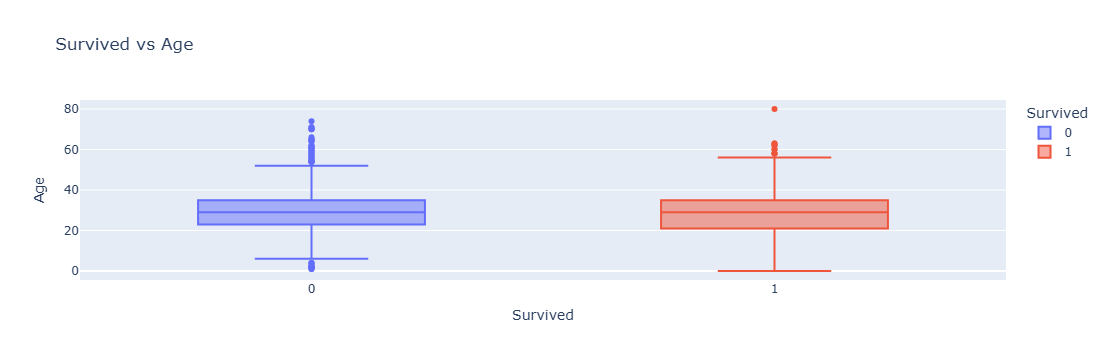

In [33]:
px.box(df,y='Age',x='Survived',color='Survived',title='Survived vs Age')

#### survived vs gender

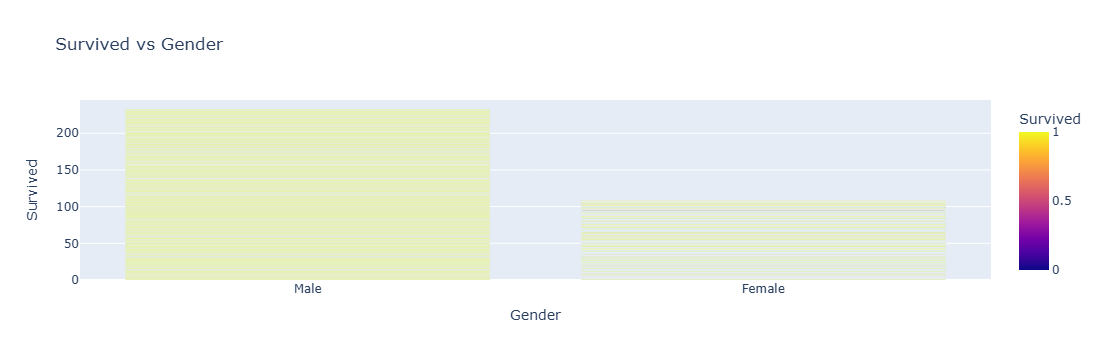

In [63]:
fig= px.bar(df,y='Survived',x='Gender',color='Survived',title='Survived vs Gender',barmode='stack')

fig.update_traces(
    hovertemplate=
    "Gender: %{x}<br>"
)

fig.update_xaxes(
    tickmode='array',
    tickvals=[0, 1],
    ticktext=['Male', 'Female']
)

## Model

In [75]:
cols= ['Age','Pclass','Gender','Fare']
X= df[cols]
y= df['Survived']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
log_reg= LogisticRegression()

log_reg.fit(X_train,y_train)

y_pred= log_reg.predict(X_test)

accuracy= accuracy_score(y_test,y_pred)
f1= f1_score(y_test,y_pred)
recall= recall_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)

print(f"Accuracy: {accuracy*100:.3f} %")
print(f"F1 score: {f1:.3f} ")
print(f"Precision score: {precision:.3f} ")
print(f"Recall score: {recall:.3f} ")

Accuracy: 79.330 %
F1 score: 0.722 
Precision score: 0.750 
Recall score: 0.696 


## Confusion matrix

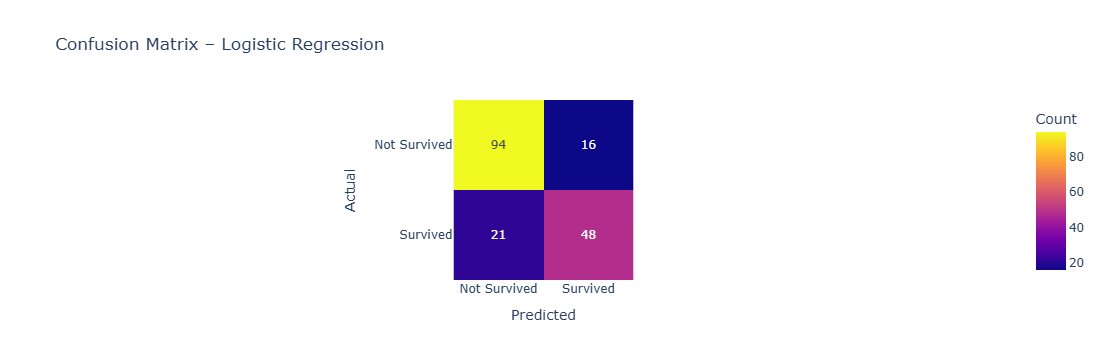

In [78]:
cm= confusion_matrix(y_test,y_pred)

fig = px.imshow(
    cm,
    text_auto=True,
    labels=dict(x="Predicted", y="Actual", color="Count"),
    x=["Not Survived", "Survived"],
    y=["Not Survived", "Survived"],
    title="Confusion Matrix – Logistic Regression"
)

fig.show()